# Metaheuristica
Jose Alberto Kaun Sada | A01720289 | 14 de nov de 2023

## Importación de módulos
Para utilizar las MHs ocupamos los siguientes módulos: _metaheuristic_, *benchmark_func*, _operators_

In [ ]:
# Importar módulos de customhys: metaheuristic, benchmark_fun, operators
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from customhys import benchmark_func, metaheuristic, operators


## Problema a resolver


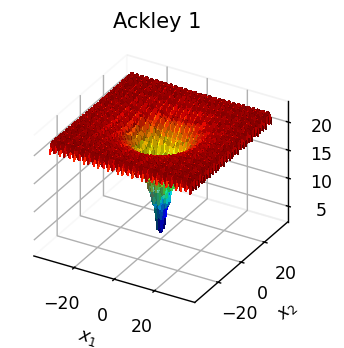

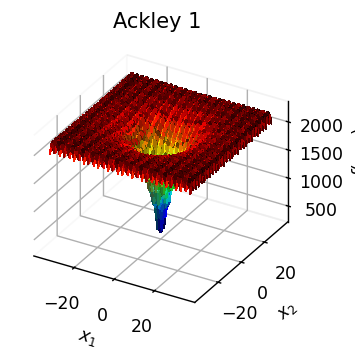

In [ ]:
# Definir problema de optimización a resolver
# --- Escoger problema del módulo benchmark_func (e.g. Sphere) y número de dimensiones
ackley_func = benchmark_func.Ackley1(2)
ackley_func.plot(samples=100, resolution=125)
plt.show()

ackley_func.set_offset_function(-3)
ackley_func.set_scale_function(100)

ackley_func.plot(samples=100, resolution=125)
plt.show()



## Operadores a utilizar

In [ ]:
# Definir los operadores de la MH
# --- Lista de tuplas, donde cada tupla es un operador (perturbador+selector)
# --- Por ejemplo, para PSO (un solo operador):
# --- --- Perturbador = swarm_dynamic
# --- --- --- Params = factor, self_conf, swarm_conf, version, distribution
# --- --- Selector = all

mh_operatros = [("random_search",{'scale': 1.0, 'distribution': 'uniform'},"greedy"),
("differential_mutation",{'expression': 'rand', 'num_rands': 1, 'factor': 1.0},"probabilistic"),
("local_random_walk",{'probability': 0.75, 'scale': 1.0, 'distribution': 'uniform'},"metropolis")]

pso_operators = [("swarm_dynamic",{'factor': 0.7, 'self_conf': 2.54, 'swarm_conf': 2.56, 'version': 'inertial', 'distribution': 'uniform'},"all")]


## Metaheurística

In [ ]:
# Crear objeto de MH: problema, parámetros, iteraciones, agentes
sphere_fun = benchmark_func.Sphere(20)
prob = sphere_fun.get_formatted_problem()
prob

# Configurar output en consola
# Usar MH para resolver el problema (método run)

met = metaheuristic.Metaheuristic(prob, mh_operatros, num_iterations=1000)
met.verbose = True
met.run()
print('x_best = {}, f_best = {}'.format(*met.get_solution()))





Search operators to employ:
random_search(scale=1.0,distribution='uniform') with greedy
differential_mutation(expression='rand',num_rands=1,factor=1.0) with probabilistic
local_random_walk(probability=0.75,scale=1.0,distribution='uniform') with metropolis
--------------------------------------------------
1
pop. radius: 3.4818711136456644
x_best = [ -5.09884435 -27.22313256  10.89291023   6.53839711 -61.93227739
 -61.72944871   8.39150055  84.89139367  14.98348781  23.03505879
 -13.63866489   2.82674278  35.24860455  59.84676453   3.56899776
   3.38369686 -18.19513152  58.76203666  35.31710981  -5.02673733], f_best = 26705.61620186405
2
pop. radius: 3.786164049384639
x_best = [ -5.09884435 -27.22313256  10.89291023   6.53839711 -61.93227739
 -61.72944871   8.39150055  84.89139367  14.98348781  23.03505879
 -13.63866489   2.82674278  35.24860455  59.84676453   3.56899776
   3.38369686 -18.19513152  58.76203666  35.31710981  -5.02673733], f_best = 26705.61620186405
3
pop. radius: 3.7502

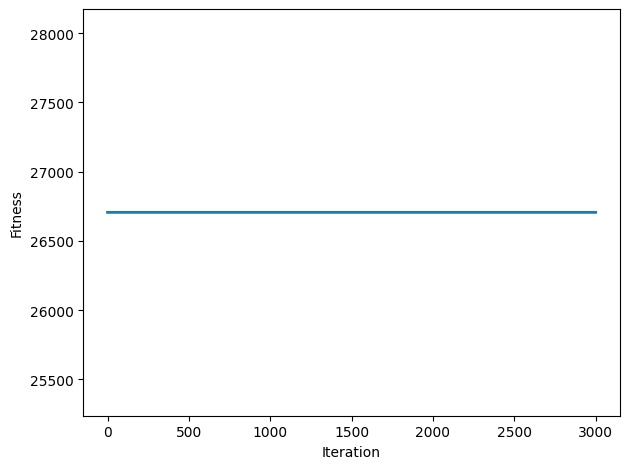

In [ ]:
hist_values = met.historical

plt.figure()
plt.plot(hist_values['fitness'], lw=2)
plt.xlabel('Iteration'), plt.ylabel('Fitness')
plt.tight_layout()
plt.show()

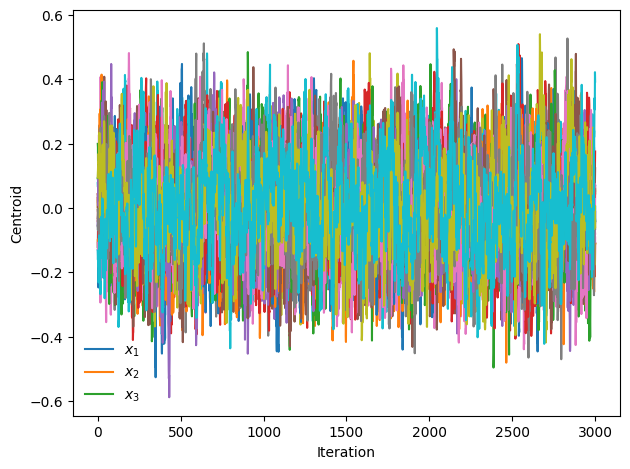

In [ ]:
plt.figure()
plt.plot(hist_values['centroid'])
plt.xlabel(r'Iteration'), plt.ylabel(r'Centroid')
plt.legend([r'$x_1$', r'$x_2$', r'$x_3$'], frameon=False)
plt.tight_layout()
plt.show()

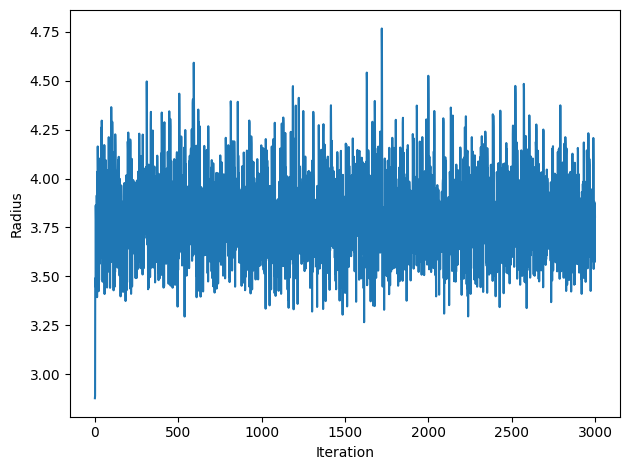

In [ ]:
plt.figure()
plt.plot(hist_values['radius'])
plt.xlabel(r'Iteration'), plt.ylabel(r'Radius')
plt.tight_layout()
plt.show()

## PSO

In [ ]:
# Crear objeto de MH: problema, parámetros, iteraciones, agentes
sphere_fun_pso = benchmark_func.Sphere(20)
prob_pso = sphere_fun.get_formatted_problem()
prob_pso

# Configurar output en consola
# Usar MH para resolver el problema (método run)

met_pso = metaheuristic.Metaheuristic(prob, pso_operators, num_iterations=1000)
met_pso.verbose = True
met_pso.run()
print('x_best = {}, f_best = {}'.format(*met_pso.get_solution()))





Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='uniform') with all
--------------------------------------------------
1
pop. radius: 2.661161820221946
x_best = [ 53.52359896  21.48491828  69.96262729  28.67197959  47.61088237
 -38.41134844   6.48943777  27.90113547  -8.10466069  36.11933999
  67.3496855   64.34588502  17.68955408 -69.03622883  49.08766493
 -90.72215557 -24.80830084  -0.24708251 -37.21624005  11.27651827], f_best = 41499.459067186945
2
pop. radius: 3.4559128756908555
x_best = [ 53.52359896  21.48491828  69.96262729  28.67197959  47.61088237
 -38.41134844   6.48943777  27.90113547  -8.10466069  36.11933999
  67.3496855   64.34588502  17.68955408 -69.03622883  49.08766493
 -90.72215557 -24.80830084  -0.24708251 -37.21624005  11.27651827], f_best = 41499.459067186945
3
pop. radius: 3.5940059729905025
x_best = [ 53.52359896  21.48491828  69.96262729  28.67197959  47.61088237
 -38.41134844   6.48943777  27

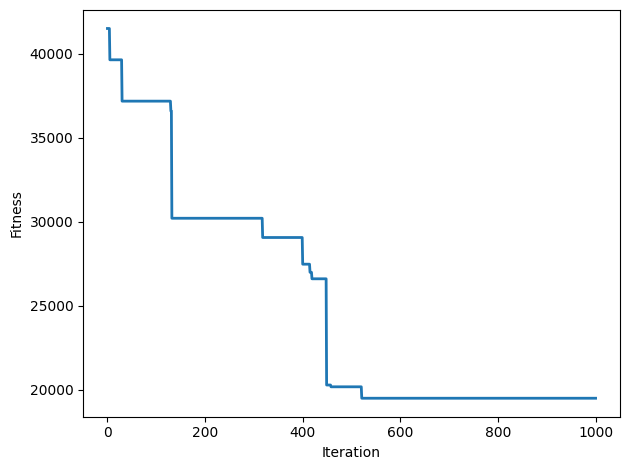

In [ ]:
hist_values_pso = met_pso.historical

plt.figure()
plt.plot(hist_values_pso ['fitness'], lw=2)
plt.xlabel('Iteration'), plt.ylabel('Fitness')
plt.tight_layout()
plt.show()

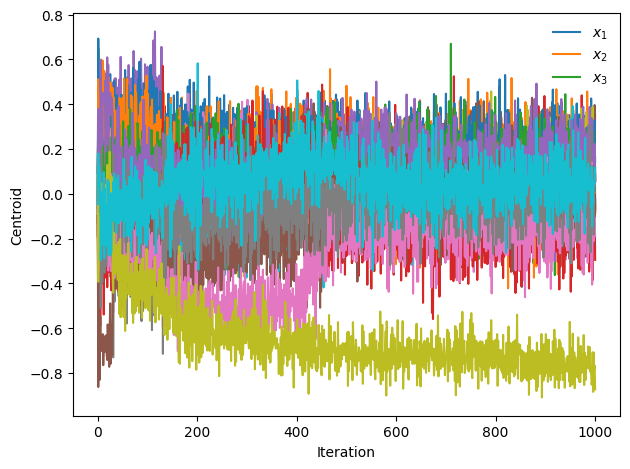

In [ ]:
plt.figure()
plt.plot(hist_values_pso ['centroid'])
plt.xlabel(r'Iteration'), plt.ylabel(r'Centroid')
plt.legend([r'$x_1$', r'$x_2$', r'$x_3$'], frameon=False)
plt.tight_layout()
plt.show()

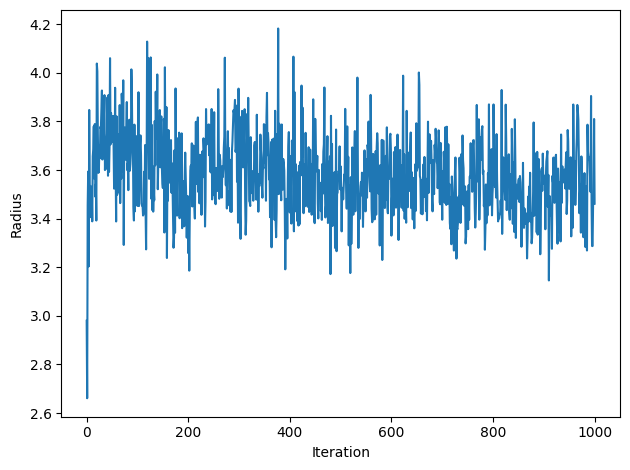

In [ ]:
plt.figure()
plt.plot(hist_values_pso ['radius'])
plt.xlabel(r'Iteration'), plt.ylabel(r'Radius')
plt.tight_layout()
plt.show()

## Análisis de resultados

Comenzando con la grafica de fitness, es primeramente importante notar que ambos metodos llegaron a un nivel de fitness satisfactorio. Lo importante aqui es el hecho de que al primer metodo de metaheuristica le tomo 3 veces mas iteraciones llegar a ese resulado. Esto era de esperarse puesto que
hace 1000 iteraciones para cada una de las operaciones de busqueda que le dimos, pero algo interesante que notamos es que cuando reducimos el numero
de operadores, el numero de iteraciones baja y la velocidad a la que el fitness llega a su valor deseado es mucho mas rapida, es decir la funcion
tiene un descenso mayor. Esto no ocurre con el PSO a pesar de que unicamente tiene un operador, por asi decirlo, lo que indicaria que podriamos
hacer que el primer metodo sea mejor para optimizar el fitness si lidiaramos unicamente con un operador.

Ahora debemos hablar de la segunda grafica de centroides. En el contexto de la optimizacion y los algoritmos, es importante recordar que nos referimos
a un centroide como un punto central que india la posicion promedio de ciertos elementos. En nuestro caso, nos dice el valor promedio a traves de
las iteraciones que realizamos. Nuevamente, la grafica tiene 3000 iteraciones, 3 veces mas que la grafica de PSO. Sin embargo, hay un patron claro
en ambas. En la grafica de la metaheuristica notamos que el promedio de los valores en todas las iteraciones tiende al centro. No hay mucha desviacion
de los valores y si bien el posicionamiento de las lineas indicando los promedios parecen ser al azar, no hay una clara tendencia hacia arriba o abajo
en los valores. Por otro, la grafica del PSO claramente meustra como los valores promedio suben y bajan consistentemente. Esto tiene sentido, pues el
PSO funciona de tal forma que optimiza un problema iterativamente al buscar mejoras a su solucion candidato (representadas como particulas en la grafica). El movimiento de estas particular debe, entonces, seguir un patron ya que dependen del valor de la particula anterior, y es lo que observamos
en la grafica. Un analisis determinado y claro del valor que intenta encontrar.




